## Assess the relationship scDRS heterogeneity Z scores and the # of cells and a proxy of disease relevant heterogeneity: annotated clusters based on comparing RA and Controls

### 0. Colors & Set Up

In [2]:
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_fib <- c('F-0: PRG4+ CLIC5+ lining'='#A6CEE3',
                   'F-1: PRG4+ lining'='#1F78B4', 
                   'F-2: CD34+ sublining'='#B2DF8A', 
                   'F-3: POSTN+ sublining'='#33A02C', 
                   'F-4: DKK3+ sublining'='#E31A1C', 
                   'F-5: CD74-hi sublining'='#FB9A99', 
                   'F-6: CXCL12+ SFRP1+ sublining'='#FDBF6F', 
                   'F-7: NOTCH3+ sublining'='#FF7F00', 
                   'F-8: RSPO3+ intermediate'='#6495ED', 
                   'Mu-0: Mural'='#9932CC')

meta_colors_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#A6CEE3", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#B2DF8A", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#FF7F00", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "#1F78B4",
                   "B-4: AICDA+BCL6+ GC-like" = "#33A02C",
                   "B-5: CD11c+LAMP1+ ABC" = "#CAB2D6",
                   "B-6: IgM+ plasma" = "#FDBF6F", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "brown",
                   "B-8: IgG1+IgG3+ plasma" = "#6A3D9A"
                   )

meta_colors_t <- c("T-0: CD4+ IL7R+ memory" = "#A6CEE3", "T-1: CD4+ CD161+ memory" = "#1F78B4", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#B2DF8A", "T-3: CD4+ Tfh/Tph" = "#33A02C", 
                 "T-4: CD4+ naive" = "#FB9A99", "T-5: CD4+ GZMK+ memory" = "#E31A1C", 
                 "T-6: CD4+ memory" = "#FDBF6F", "T-7: CD4+ Tph" = "#FF7F00", 
                 "T-8: CD4+ CD25-high Treg" = "#CAB2D6", "T-9: CD4+ CD25-low Treg" = "#6A3D9A", 
                 "T-10: CD4+ OX40+NR3C1+" = "#FFFF99", "T-11: CD4+ CD146+ memory" = "#B15928", 
                 "T-12: CD4+ GNLY+" = "#B3E2CD", "T-13: CD8+ GZMK/B+ memory" = "#FDCDAC", 
                 "T-14: CD8+ GZMK+ memory" = "#CBD5E8", "T-15: CD8+ GZMB+/TEMRA" = "#F4CAE4",
                 "T-16: CD8+ CD45ROlow/naive" = "#1B9E77", "T-17: CD8+ activated/NK-like" = "#D95F02",
                 "T-18: Proliferating" = "#7570B3", "T-19: MT-high (low quality)" = "#E7298A", 
                 "T-20: CD38+" = "#66A61E", "T-21: Innate-like" = "#E6AB02", 
                 "T-22: Vdelta1" = "#A6761D", "T-23: Vdelta2" = "#666666")

meta_colors_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#9E0142", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#D53E4F", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#F46D43",
                    "NK-3: CD56dim CD16+ GZMB-" = "#FDAE61", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#FEE08B", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#FFFFBF", 
                    "NK-6: CD56bright CD16- GNLY+" = "#E6F598", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#ABDDA4", 
                    "NK-8: CD56bright CD16- IFN response" = "#66C2A5",
                    "NK-9: MT-high" = "#3288BD", 
                    "NK-10: PCNA+ Proliferating" = "grey",
                    "NK-11: MKI67+ Proliferating" = "dimgrey", 
                    "NK-12: IL7R+ ILC" = "#BEAED4", 
                    "NK-13: IL7R+CD161+ ILC" = "#5E4FA2")

meta_colors_end <- c("E-0: SPARC+ capillary" = "#8DD3C7", 
                     "E-1: LIFR+ venular" = "#BEBADA",
                     "E-2: ICAM1+ venular" = "#FB8072", 
                     "E-3: NOTCH4+ arteriolar" = "#80B1D3", 
                     "E-4: Lymphatic" = "#FDB462")
meta_colors <- c(meta_colors_b, meta_colors_end, meta_colors_fib, meta_colors_mac, meta_colors_t, meta_colors_nk)

meta_colors <- c(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib, meta_colors_end)

In [3]:
meta_colors_macro <- c("B cell" = "#9b543e", 
                      "Fibroblast" = "#A6CEE3", 
                      "Endothelial" = "#1c7ab6", 
                      "Myeloid" = "#f08176", 
                      "NK" = "#744ea4", 
                      "T cell" = "#c8b2d6")

In [4]:
meta_colors1 <- list(meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)

In [5]:
library(data.table)
library(ggplot2)
library(cowplot)
library(tidyverse)
library(ggrepel)
library(ggnewscale)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
✔ purrr   1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


## 1. Read in results

In [6]:
data_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/"
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"

In [7]:
# read in macro & micro tables
micro_table <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_micro"))
macro_table <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_macro"))

In [8]:
# add spaces to the long clusters
add_spaces_dict <- c("B-0: CD24+CD27+CD11b+\n switched memory", 
                    "B-1: CD24++CD27+IgM+\n unswitched memory")
names(add_spaces_dict) <- c("B-0: CD24+CD27+CD11b+ switched memory", "B-1: CD24++CD27+IgM+ unswitched memory")
micro_table$group2 <- as.character(micro_table$group)
for (cell_group in names(add_spaces_dict)) {
    print(add_spaces_dict[cell_group])
    micro_table[micro_table$group == cell_group,]$group2 <- add_spaces_dict[cell_group]
    }

    B-0: CD24+CD27+CD11b+ switched memory 
"B-0: CD24+CD27+CD11b+\n switched memory" 
    B-1: CD24++CD27+IgM+ unswitched memory 
"B-1: CD24++CD27+IgM+\n unswitched memory" 


## 2. Assess the relationship between of heterogeneity of disease connection and the # of cells (scDRS only)

In [9]:
# get the order according to the number of cells
test <- micro_table[order(micro_table$n_cell)]
test[1:2,]
size_order <- test$group
rm(test)

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,group2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NK-8: CD56bright CD16- IFN response,31,1000,0.4695305,0.002586506,0.6753247,-0.3429443,0,0,0,NK-8: CD56bright CD16- IFN response
NK-3: CD56dim CD16+ GZMB-,59,1000,0.1768232,0.902943500,0.1668332,1.0002460,0,0,1,NK-3: CD56dim CD16+ GZMB-


[1] 77 11

[1] 67 11

[1] 58 11

[1] 37 11

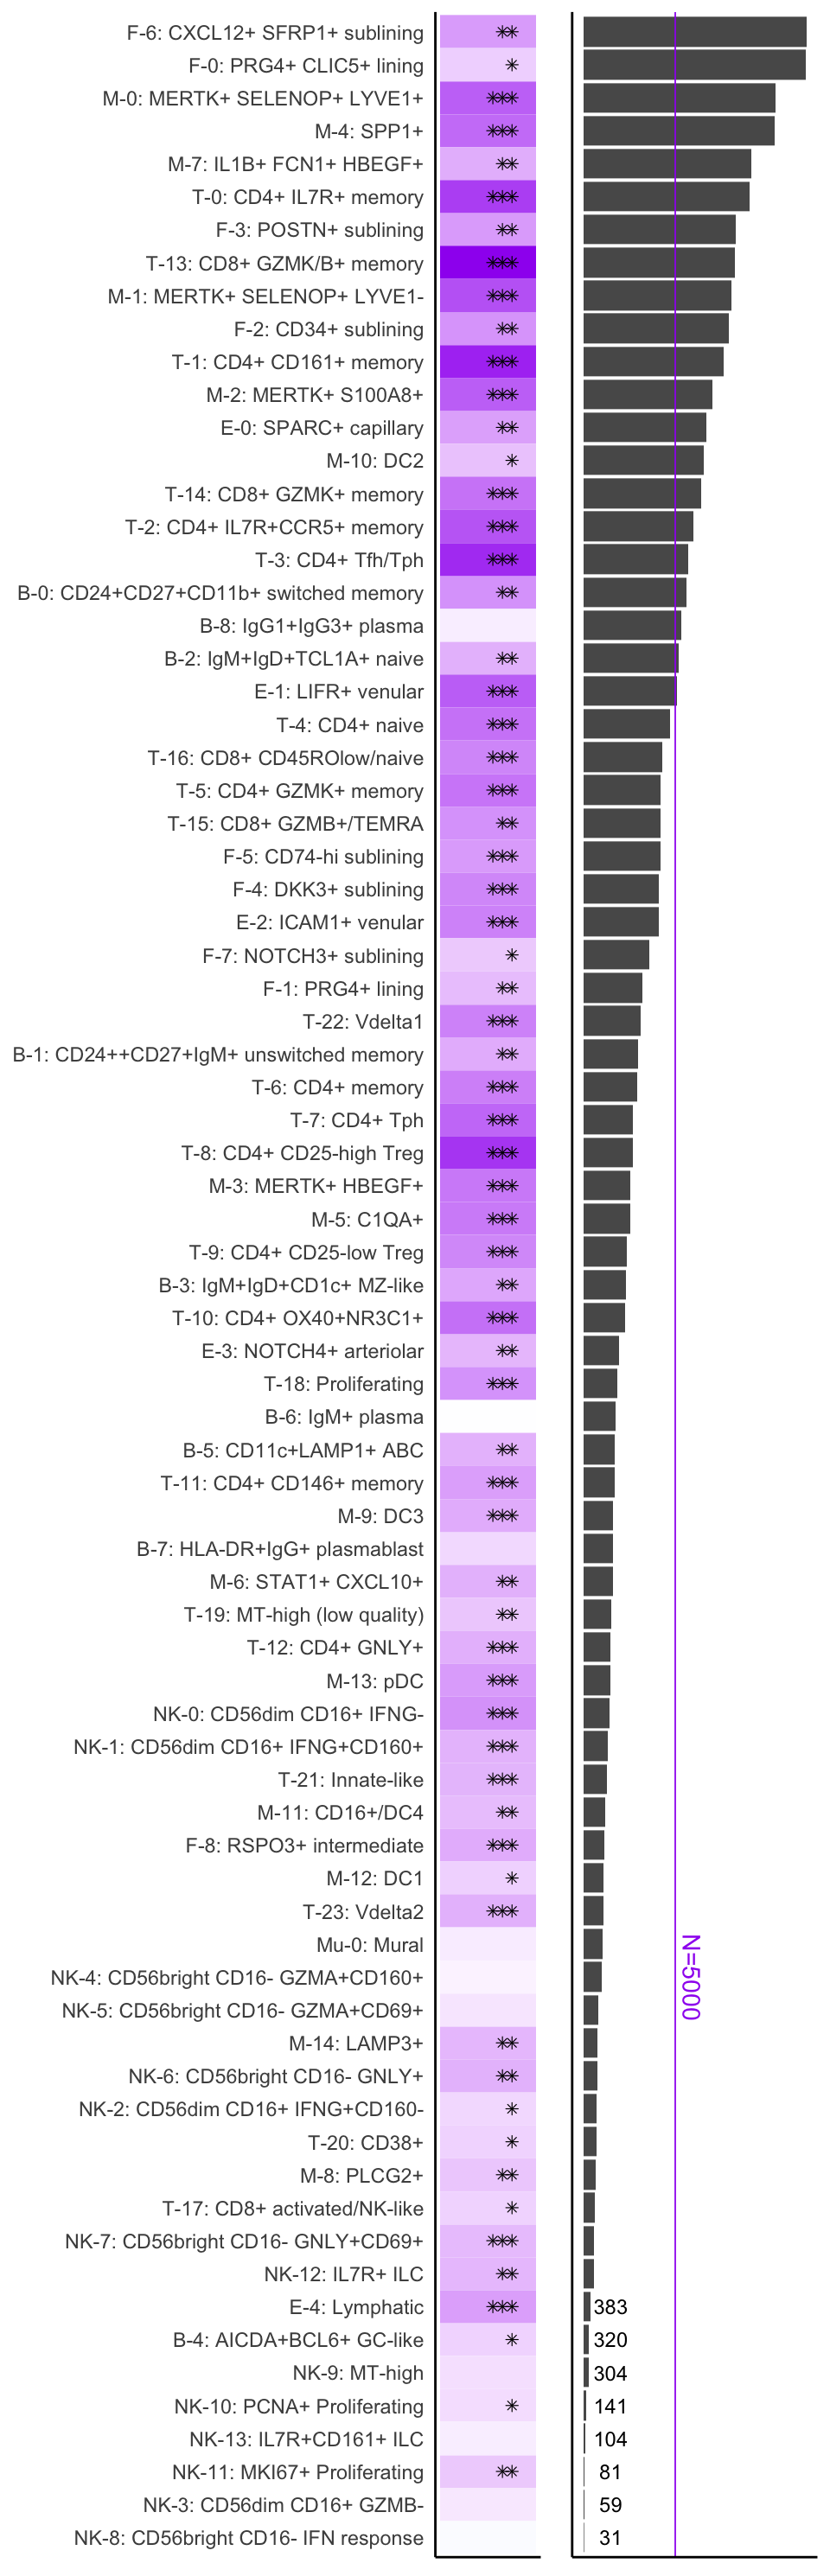

In [11]:
dim(micro_table)
dim(micro_table[micro_table$hetero_mcp < 0.05,])
dim(micro_table[micro_table$hetero_mcp < 0.01,])
dim(micro_table[micro_table$hetero_mcp < 0.001,])

data <- micro_table
options(repr.plot.height = nrow(data)/2.8, repr.plot.width =10 )

p1 <- 
    ggplot(data) + 
    geom_tile(aes(x=0.5, y=factor(group, levels=size_order), fill=hetero_mcz)) + 
    scale_fill_gradient2(low="cornflowerblue", mid="white", high="purple", midpoint=0) + 
    geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=size_order)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$hetero_mcp < 0.01,], aes(x=0.65, y=factor(group, levels=size_order)), size=2.5, color='black', shape=8) + 
    geom_point(data = data[data$hetero_mcp < 0.001,], aes(x=0.55, y=factor(group, levels=size_order)), size=2.5, color='black', shape=8) + 
    #geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors)), size = hetero_mcz), color='black') + 

    theme_classic(base_size =17.5) + 
    theme( 
          axis.text.x = element_blank(), legend.position="None", 
          axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
         axis.ticks.x = element_blank(), axis.title.x = element_blank())
p2 <- ggplot(data) + geom_bar(data=micro_table, aes(x=n_cell, y=factor(group, levels=size_order)), stat="identity")  +
theme_classic(base_size =17.5) +
geom_text(data=micro_table[micro_table$n_cell < 500,], aes(x=1500, y=factor(group, levels=size_order), label=n_cell), size=5) +
scale_y_discrete(size_order) + geom_vline(xintercept = 5000, color="purple") + annotate("text", x=5900, y=18, label = "N=5000", angle=270, color="purple", size=6) + 
theme(axis.text.x = element_blank(), legend.position="right", axis.text.y = element_blank(),
      axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
     axis.ticks.x = element_blank(), axis.title.x = element_blank())#axis.text.x = element_text(angle=90),
#scale_fill_gradient(low="white", high="grey") + 
#geom_text(data=micro_table[micro_table$n_cell < 100,], aes(x=400, y=factor(group, levels=ranked_cell_clusters), label=n_cell)) +
#scale_y_discrete(ranked_cell_clusters) 
options(repr.plot.height = nrow(data)/3.1, repr.plot.width =8)
plot_grid(p1, p2, nrow=1, rel_widths=c(1,.5))
ggsave("../../output/Final_figures/Het/Het_RA-07-28-23.pdf", height=nrow(data)/3.1, width=8)

## 2. Assess the relationship between the heterogeneity score of macro cell groups and # of clusters

In [12]:
macro_table
# add number of clusters
macro_table$n_clusters <- c(9, 5, 10, 15, 14, 24)
# add a group label (first letter) for easy labeling
macro_table$graph_label <- as.factor(c("B", "End", "Fib", "My", "NK", "T"))
macro_table

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,26771,1000,0.096903100,1.442866,0.002997003,2.803563,234,571,1445
Endothelial,18241,1000,0.951049000,-1.512432,0.002997003,4.319029,3,7,45
Fibroblast,57705,1000,1.000000000,-3.193880,0.013986014,2.944837,1,14,68
Myeloid,65189,1000,0.000999001,4.556192,0.000999001,5.810294,2146,4284,8384
NK,7925,1000,0.061938062,1.713575,0.017982017,2.996242,45,127,380
T cell,86865,1000,0.000999001,8.762294,0.000999001,11.211103,3154,5683,10528


group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,n_clusters,graph_label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
B cell,26771,1000,0.096903100,1.442866,0.002997003,2.803563,234,571,1445,9,B
Endothelial,18241,1000,0.951049000,-1.512432,0.002997003,4.319029,3,7,45,5,End
Fibroblast,57705,1000,1.000000000,-3.193880,0.013986014,2.944837,1,14,68,10,Fib
Myeloid,65189,1000,0.000999001,4.556192,0.000999001,5.810294,2146,4284,8384,15,My
NK,7925,1000,0.061938062,1.713575,0.017982017,2.996242,45,127,380,14,NK
T cell,86865,1000,0.000999001,8.762294,0.000999001,11.211103,3154,5683,10528,24,T


In [13]:

# add the group numbers to the names for easy labeling:
micro_table$graph_label <- str_split_fixed(micro_table$group, ":", 2)[,1]
micro_table$cell <- str_split_fixed(micro_table$group, "-", 2)[,1]
micro_table[1:2,]
micro_table[micro_table$cell == "Mu",]$cell <- "F"

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,group2,graph_label,cell
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
B-0: CD24+CD27+CD11b+ switched memory,5606,1000,0.01998002,2.267116,0.001998002,4.987217,47,136,372,B-0: CD24+CD27+CD11b+ switched memory,B-0,B
B-1: CD24++CD27+IgM+ unswitched memory,2958,1000,0.04995005,1.707947,0.002997003,3.731718,16,63,141,B-1: CD24++CD27+IgM+ unswitched memory,B-1,B


## 3. Regression based analysis

In [14]:
# ones to label
no_label_points <- c("E-4", "NK-11", "T-11", "T-18", "F-1", "B-1", "F-5", "F-4", "T-6", "E-2", "T-22", "T-9", "NK-3", "M-13", "T-5", "M-5", "NK-5", 
                    "M-8", "NK-10", "T-19", "M-3", "T-4", "NK-9", "B-4", "T-15", "T-17", "M-12", "B-3", "T-16", "NK-2", "T-20", "NK-13")

In [15]:
summary(lm(hetero_mcz ~ n_cell, micro_table))
summary(lm(hetero_mcz ~ n_cell, macro_table))
summary(lm(n_clusters ~ n_cell, macro_table))


Call:
lm(formula = hetero_mcz ~ n_cell, data = micro_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8928 -1.3381  0.0103  1.3946  5.3531 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.779e+00  3.561e-01   7.804 2.82e-11 ***
n_cell      4.373e-04  7.745e-05   5.646 2.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.095 on 75 degrees of freedom
Multiple R-squared:  0.2982,	Adjusted R-squared:  0.2889 
F-statistic: 31.87 on 1 and 75 DF,  p-value: 2.788e-07



Call:
lm(formula = hetero_mcz ~ n_cell, data = macro_table)

Residuals:
      1       2       3       4       5       6 
-0.8350  1.3702 -3.1951 -0.9348  0.8815  2.7133 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.474e+00  1.765e+00   0.835   0.4506  
n_cell      8.086e-05  3.392e-05   2.384   0.0757 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.334 on 4 degrees of freedom
Multiple R-squared:  0.5869,	Adjusted R-squared:  0.4836 
F-statistic: 5.682 on 1 and 4 DF,  p-value: 0.07568



Call:
lm(formula = n_clusters ~ n_cell, data = macro_table)

Residuals:
     1      2      3      4      5      6 
-1.278 -3.996 -4.925 -1.049  6.554  4.694 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 6.256e+00  3.927e+00   1.593    0.186
n_cell      1.502e-04  7.549e-05   1.990    0.117

Residual standard error: 5.195 on 4 degrees of freedom
Multiple R-squared:  0.4975,	Adjusted R-squared:  0.3719 
F-statistic: 3.961 on 1 and 4 DF,  p-value: 0.1174


**Summary:**
The heterogeneity z score could be predicted from the number of cells in the micro clusters (P=2.79e-07)but not as well with the large (macro) cell groups (P=0.076).
Importantly, the # cells does not predict the number of cells very well (pval 0.117)

In [16]:
summary(lm(hetero_mcz ~ n_clusters, macro_table))


Call:
lm(formula = hetero_mcz ~ n_clusters, data = macro_table)

Residuals:
       1        2        3        4        5        6 
-0.63412  2.52638 -0.90411 -0.09495 -2.49774  1.60453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.2636     1.9576  -0.135    0.899  
n_clusters    0.4113     0.1382   2.975    0.041 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.026 on 4 degrees of freedom
Multiple R-squared:  0.6887,	Adjusted R-squared:  0.6109 
F-statistic: 8.849 on 1 and 4 DF,  p-value: 0.04095


**Summary:**
The heterogeneity z score could be decently predicted solely from the number of annotated clusters in the macro cell groups (pval 0.051 and adjR^2 0.61). The low significance might be explained by the low number of samples to assess from.

In [ ]:
summary(lm(hetero_mcz ~ n_cell, micro_table))$adj.r.squared
summary(lm(hetero_mcz ~ n_cell, macro_table))$adj.r.squared
summary(lm(hetero_mcz ~ n_clusters, macro_table))$adj.r.squared
summary(lm(n_clusters ~ n_cell, macro_table))$adj.r.squared
# plot the number of cells with heterogeneity
options(warn = -1)
p1 <- ggplot(micro_table, aes(x=n_cell, y=hetero_mcz)) + geom_point() + theme_bw(base_size=15) + 
geom_smooth(method='lm', formula= y~x, color="red") + annotate("text", x=10000, y=10.3, label = "adjR^2=0.29\npval=2.79e-7", color="red", size=5) + xlim(0, 1.25e4) +
labs(x="Number cells in annotated clusters ", y="scDRS Heterogeneity Group Z-score \n(Micro clusters)") +
ggtitle("D) ") #+ geom_text_repel(data=micro_table[!micro_table$graph_label %in% no_label_points,], mapping=aes(x=n_cell, y=hetero_mcz, label=graph_label))
p2 <- ggplot(macro_table, aes(x=n_cell, y=hetero_mcz, label=graph_label)) + geom_point() + theme_bw(base_size=15) + 
geom_smooth(method='lm', formula= y~x, color="red") + annotate("text", x=50000, y=10, label = "adjR^2=0.48\npval=0.08", color="red", size=5) +
labs(x="Number cells per Macro cell type", y="scDRS Heterogeneity Group Z-score \n(Macro cell types)") +
ggtitle("B) ") + geom_text_repel()
p3 <- ggplot(macro_table, aes(x=n_clusters, y=hetero_mcz, label=graph_label)) + geom_point() + theme_bw(base_size=15) + 
geom_smooth(method='lm', formula= y~x, color="red") + annotate("text", x=11, y=10, label = "adjR^2=0.61\npval=0.04", color="red", size=5) +
labs(x="Number annotated clusters per Macro cell type", y="scDRS Heterogeneity Group Z-score \n(Macro cell types)") +
ggtitle("C) ")+ geom_text_repel()
options(repr.plot.height = 5, repr.plot.width=18)
p4 <- ggplot(macro_table, aes(x=n_cell, y=n_clusters, label=graph_label)) + geom_point() + theme_bw(base_size=15) + 
geom_smooth(method='lm', formula= y~x, color="red") + annotate("text", x=45000, y=22, label = "adjR^2=0.37\npval=0.18", color="red", size=5) +
labs(x="Number cells per Macro cell types", y="Number clusters per Macro cell types") +
ggtitle("A) ") + geom_text_repel()
options(repr.plot.height = 5, repr.plot.width=24)
p <- plot_grid(p4, p2, p3, p1, nrow=1)
p
options(warn = 1)

In [91]:
dim(micro_table)

[1] 77 13

In [90]:
pdf("../../output/Final_figures/Het/Het_regression.pdf", height=5, width=24)
print(p)
dev.off()

pdf 
  2

In [74]:
micro_table[micro_table$cell == "B",]$cell <- "B cell"
micro_table[micro_table$cell == "E",]$cell <- "Endothelial"
micro_table[micro_table$cell == "F",]$cell <- "Fibroblast"
micro_table[micro_table$cell == "M",]$cell <- "Myeloid"
micro_table[micro_table$cell == "NK",]$cell <- "NK cell"
micro_table[micro_table$cell == "T",]$cell <- "T cell"

In [75]:
summary(lm(hetero_mcz ~ n_cell*cell, micro_table))


Call:
lm(formula = hetero_mcz ~ n_cell * cell, data = micro_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7676 -0.9842  0.0203  1.0695  4.1229 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             1.846e+00  9.630e-01   1.917   0.0596 .
n_cell                  2.758e-04  2.763e-04   0.998   0.3218  
cellEndothelial         2.182e+00  1.606e+00   1.359   0.1789  
cellFibroblast          1.232e+00  1.285e+00   0.959   0.3413  
cellMyeloid             1.382e+00  1.137e+00   1.215   0.2289  
cellNK cell            -9.098e-01  1.160e+00  -0.784   0.4356  
cellT cell              9.930e-01  1.112e+00   0.893   0.3754  
n_cell:cellEndothelial  1.287e-06  4.079e-04   0.003   0.9975  
n_cell:cellFibroblast  -1.854e-04  3.021e-04  -0.614   0.5415  
n_cell:cellMyeloid      7.214e-05  2.961e-04   0.244   0.8083  
n_cell:cellNK cell      1.661e-03  9.352e-04   1.776   0.0804 .
n_cell:cellT cell       5.984e-04  3.046e-04   1.965   

In [1]:
p <- ggplot(micro_table, aes(x=n_cell, y=hetero_mcz)) + geom_point() + theme_bw(base_size=15) +
geom_smooth(method='lm', formula= y~x, color="red") + #annotate("text", x=10000, y=10, label = "adjR^2=0.29", color="red", size=5) + xlim(0, 1.25e4) +
labs(x="Number cells in annotated clusters ", y="scDRS Heterogeneity Group Z-score \n(Micro clusters)") + facet_grid(~cell)
p

ERROR: Error in ggplot(micro_table, aes(x = n_cell, y = hetero_mcz)): could not find function "ggplot"


In [ ]:
pdf("../../output/Final_figures/Het/Het_regression_CT.pdf", height=5, width=24)
print(p)
dev.off()